In [66]:
from scipy import stats
import numpy as np
import pandas as pd

## Testing means (with 1 sample)

Are squirrels starving? :(

In [67]:
# here's the sample we took:
squirrels = pd.Series([1.3, 0.47, 1.5, 1.66, 2.43, 1.29, 0.94, 0.06, 1.33, 0.76, 0.01, 0.76, 0.12, 2.3, 1.24, 1.8, 2.66, 0.01, 
                       0.82, 1.62, 0.7, 0.86, 0.11, 0.33, 0.08, 0.42, 0.59, 0.12, 0.02, 0.55, 0.16, 1.25, 0.12, 0.74, 0.76, 
                       1.04, 0.09,0.21, 0.4, 0.01, 0.91, 0.04, 0.6, 6.44, 1.61, 0.13, 2.08, 0.9, 0.49, 0.98, 0.67, 0.17, 2.16, 
                       1.37, 0.08, 0.02, 0.03, 0.54, 0.63, 1.03, 0.73, 2.02])

samp_size = len(squirrels)

In [68]:
# Zoological registers say that squirrels in that area weight on average 1kg
# The mean of our sample, however, is:
squirrels_mean = squirrels.mean()
squirrels_mean

0.8914516129032257

In [69]:
# Is the mean of our sample smaller than 1kg due to chance (H0), or because the population
# of squirrels from where the sample comes has, in fact, a different mean than 1kg (H1)?

# The Standard Error of the Mean will tell us how far should we expect the mean of our sample to be 
# from the true mean of the population. Let's compute it:

np.std(squirrels)/np.sqrt(samp_size)

# Read more about the Standard Error of the Mean in page 171 of OpenIntro Statistics.


0.12566283091916977

In [70]:
#Standard error using scipy
sem_squirrels = stats.sem(squirrels, ddof=0)
sem_squirrels

0.12566283091916977

In [71]:
squirrels_mean + 2 * stats.sem(squirrels, ddof=1)

1.1448289468392998

In [72]:
squirrels_mean - 2 * stats.sem(squirrels, ddof=1)

0.6380742789671516

In [73]:
# That still doesn't answer the question: Are squirrels starving?
# We can rephrase this question in mathematical terms:
# What's the probability that the mean of our sample (0.89) comes from a population with mean = 1?
# Or, in other words: is there a statistically significant difference between the mean of our sample 
# and the reference of 1kg?

# The Null Hypothesis (H0) will be: mean(population) = 1
# The Alternative Hypothesis (H1 or HA) will be mean (population) != 1.

# (If you're wondering why we don't test for just mean < 1: having overweight squirrels is totally possible,
# and we had to decide which test to use (1-tailed or 2-tailed) before taking the sample.)

# We test a difference between 1 sample and 1 single value with a 1-sample t-test.
# We can do the t-test with a single python function: scipy.stats.ttest_1samp. 
# But first, let's unfold the underlying process.

# The Central Limit Theorem tells us that no matter the true underlying distribution of the population,
# if we take multiple samples of a fixed size and we plot the means of these samples, they will form a 
# normal distribution. This distribution is called the "Sample distribution of the sample means".

# The "Sample distribution of the sample mean" has these 3 properties:
    # 1) its mean is equal to the mean of the population (we're assuming it's 1)
    # 2) its standard deviation is equal to the standard error of our estimate (we computed it above)
    # 3) it resembles a normal distribution.

In [74]:
# Simulate the "Sample distribution of the sample means"
# normal
# mean = 1
# std = sem_squirrels

In [75]:
sampl_dist_sampl_means = np.random.normal(loc=1, # mean
                                          scale = sem_squirrels, #std
                                          size = 1000000
                                         )

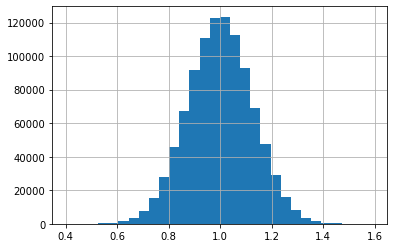

In [76]:
sampl_dist_sampl_means = pd.Series(sampl_dist_sampl_means)
sampl_dist_sampl_means.hist(bins=30);

The **z score** is the number of standard deviations that a number is away from the mean of a normal distribution.

Let's find the z score for our sample.

In [77]:
z_score = (1 - squirrels_mean) / sem_squirrels
z_score

0.8638066348083147

Our z score is `0.86`. To find the p value for that score, we can use the cumulative distribution function fot the normal distribution. We'll have to double that value, since we want to look at both extremes of the distribution.

In [78]:
# confidence level = alpha = 0.99
# reject the null with p < 0.01
stats.norm.cdf(-z_score)*2

0.3876941224873198

We can also look for the p-value in a t distribution with a n-1 degrees of freedom. The difference is neglegible.

In [79]:
stats.t.cdf(-z_score, df = 10-1)*2

0.4101239415999903

## Using scipy's ttest_1samp

Above, we manually performed a z test, which is almost identical to a t test for big samples. Read more about the t-distribution here: https://en.wikipedia.org/wiki/Student%27s_t-distribution

In [80]:
from scipy.stats import ttest_1samp

In [81]:
tscore, pvalue = ttest_1samp(a = squirrels, popmean= 1)
pvalue

0.39490229955149336

In [82]:
# pvalue > 0.01 --> fail to reject the null
# we can't be sure that squirrels are starving
# we can't disprove that the mean of the population of squirrels = 1

### Your turn:

45 WBS CODING SCHOOL students took an IQ test and their result was 130. The average IQ is 100. Test whether or not WBSCS students are different from the regular population.

In [83]:
# H0: WBSCS students have the same IQ as the general population = 100. The observed difference is due to chance.

# H1: WBSCS students have a higher / different IQ than the general population.
#                           higher --> 1 tail
#                           different --> 2 tails

In [84]:
np.random.seed(42)
np.arange(40, 210)
pop = pd.Series(np.random.choice(np.arange(40, 210), size=10000))
samp_size = 45
wbs_students = pop.sample(samp_size, replace=True)
wbs_students = wbs_students+12

In [85]:
np.mean(wbs_students)

130.0222222222222

In [86]:
print(list(wbs_students))

[172, 155, 144, 112, 79, 132, 126, 184, 145, 155, 65, 73, 56, 156, 117, 213, 143, 86, 86, 197, 54, 195, 186, 108, 76, 191, 54, 115, 106, 173, 91, 95, 144, 94, 135, 116, 182, 144, 127, 216, 71, 200, 182, 71, 129]


In [87]:
print(len(wbs_students))

45


In [88]:
print(len(pop))

10000


In [89]:
print(np.mean(pop))

125.1989


In [90]:
tscore, pvalue = ttest_1samp(a = wbs_students, popmean=100) 

In [91]:
pvalue

9.338735146790408e-05

In [92]:
0.0000093

9.3e-06

In [93]:
#pvalue < 0.05 we reject the null hypothesis
